# ImageScaling script:

In [1]:
import numpy as np
import cv2

In [185]:
alpha = ['A','B','C','D','E']
alpha2 = ['A','B','C','D','E','F','G','H','I','J','K','L','M']

width = 50
height = 50
print( 'Resized Dimensions : ' + str(width) + 'x' + str(height) ) 

for a in range(len(alpha2)):
    for b in range(len(alpha)):
        for c in range(len(alpha)):
            for d in range(len(alpha)):        
                for i in range(4):
                    img = cv2.imread('../dataset/train_coded/train_coded/' + alpha2[a] + alpha[b] + alpha[c]+ alpha[d] + str(i+1) +'.jpg', 1)
                    #cv2.imshow('Original', img)
                    #print('Original Dimensions : ', img.shape)

                    resized_img = cv2.resize(img, (50,50), interpolation = cv2.INTER_AREA)

                   # cv2.imshow("Resized image", resized)
                   # cv2.waitKey(0)
                   # cv2.destroyAllWindows()

                    filename = alpha2[a] + alpha[b] + alpha[c]+ alpha[d] + str(i+1) +'.jpg'
                    print('filename: ', filename)


                    cv2.imwrite(filename, resized_img)

Resized Dimensions : 50x50
filename:  AAAA1.jpg
filename:  AAAA2.jpg
filename:  AAAA3.jpg
filename:  AAAA4.jpg
filename:  AAAB1.jpg
filename:  AAAB2.jpg
filename:  AAAB3.jpg
filename:  AAAB4.jpg
filename:  AAAC1.jpg
filename:  AAAC2.jpg
filename:  AAAC3.jpg
filename:  AAAC4.jpg
filename:  AAAD1.jpg
filename:  AAAD2.jpg
filename:  AAAD3.jpg
filename:  AAAD4.jpg
filename:  AAAE1.jpg
filename:  AAAE2.jpg
filename:  AAAE3.jpg
filename:  AAAE4.jpg
filename:  AABA1.jpg
filename:  AABA2.jpg
filename:  AABA3.jpg
filename:  AABA4.jpg
filename:  AABB1.jpg
filename:  AABB2.jpg
filename:  AABB3.jpg
filename:  AABB4.jpg
filename:  AABC1.jpg
filename:  AABC2.jpg
filename:  AABC3.jpg
filename:  AABC4.jpg
filename:  AABD1.jpg
filename:  AABD2.jpg
filename:  AABD3.jpg
filename:  AABD4.jpg
filename:  AABE1.jpg
filename:  AABE2.jpg
filename:  AABE3.jpg
filename:  AABE4.jpg
filename:  AACA1.jpg
filename:  AACA2.jpg
filename:  AACA3.jpg
filename:  AACA4.jpg
filename:  AACB1.jpg
filename:  AACB2.jpg
filenam

KeyboardInterrupt: 

# Scaled image to matlabfile:
In this part of the script, the image is being written to a matlab file: [`matlab_matrix.mat`]. The image is transfered to an array with dimension (50x50x3). These individual arrays are concatenated as one long array.

In [71]:
from PIL import Image
from scipy.io import savemat
from scipy.io import loadmat
import scipy.io as sio

In [171]:
arr4 = []

for a in range(len(alpha2)):
    for b in range(len(alpha)):
        for c in range(len(alpha)):
            for d in range(len(alpha)):       
                for i in range(4):
                    filename = alpha2[a] + alpha[b] + alpha[c]+ alpha[d] + str(i+1) +'.jpg'
                    rescaled_img = Image.open("../dataset\Scaled\Train_coded/"+str(filename))

                    arr = np.array(rescaled_img)              # 50x50x3 array
                    arr2 = np.concatenate(arr, axis =0)       # 2500x3  array
                    arr3 = np.concatenate(arr2, axis =0)      # 7500    array

                    arr4.append(arr3)


mdic = {'Train_coded': arr4}
savemat("matlab_matrix.mat", mdic)

# Matlabfile array to usable array for RGB image:

In [174]:
mat_contents = sio.loadmat('matlab_matrix.mat')
print(mat_contents)

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Thu Nov 11 22:30:19 2021', '__version__': '1.0', '__globals__': [], 'Train_coded': array([[163, 165, 164, ..., 159, 159, 159],
       [165, 165, 165, ..., 158, 158, 158],
       [163, 165, 164, ..., 160, 160, 160],
       ...,
       [145, 145, 145, ..., 156, 157, 161],
       [147, 146, 144, ..., 158, 158, 160],
       [145, 145, 145, ..., 159, 158, 163]], dtype=uint8)}


In [175]:
mat_contents['Train_coded']

for i in range(10):
    print(mat_contents['Train_coded'][0][i])

163
165
164
163
165
164
162
164
163
162


In [188]:
def image_array(imageNumber):

    k, l, m = 50, 50, 3
    matrix = [[[0 for x in range(m)] for y in range(l)] for z in range(k)]

    j=0
    for x in range(50):
        for y in range(50):
            for z in range(3):
                matrix[x][y][z] = mat_contents['Train_coded'][imageNumber][j] 
                j += 1;    
                
    array_final = np.asarray(matrix)
    return array_final

In [189]:
def choose_image(imageNumber):

    chosen_image_array = image_array(10)
    chosen_image = Image.fromarray(chosen_image_array, 'RGB')
    img_from_array.show()

    return chosen_image

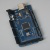

In [190]:
choose_image(10)